# SpotiScry
### Date: January 2021
### Project Goal:
What makes a song reach the top of the charts while others flop? Using data from Spotify, our team will determine what features influence song popularity - such as the danceability or song length. We will then predict a song’s popularity using regression and achieve an RMSE lower than the baseline model.

Topics

### Creators:
**The SpotiScyers:** Brandon Martinez, Bethany Thompson, [Kwame V. Taylor](https://github.com/KwameTaylor), Matthew Mays

## Table of Contents
- [Acquire](#acquire)
- [Prepare](#prepare)
- [Explore](#explore)
- [Model](#model)
- [Conclusions](#conclusions)

# Set up Environment

In [1]:
import pandas as pd
import numpy as np

In [2]:
from prepare import handle_nulls
from explore import explicit_viz
from preprocessing import spotify_split, scale_data

# Acquire <a class="anchor" id="acquire"></a>

In [3]:
# import the temporary csv dataset
df = pd.read_csv('full-playlist.csv', index_col=0)

In [4]:
df.head(3)

,artist,album,release_date,track_name,album_popularity,label,danceability,energy,key,loudness,...,disc_number,track_number,album_id,album_type,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day
track_id,,,,,,,,,,,,,,,,,,,,,
6mecZbKK3JDeMdFRNxsCV5,tay-k,trapman,2020-07-12,trapman,36,Tay-K,0.792,0.594,2,-8.544,...,1,1,2J1hMj78HfdcMrmL2Sk6eR,single,232,3,0,2020,7,12
5PtMwNq8Dp31uYdGGacVJE,lil wyte,doubt me now,2003-03-04,oxy cotton,55,Hypnotize Minds Productions,0.816,0.578,9,-6.912,...,1,11,2lwxcemR1muymEHNMblCpm,album,193,3,0,2003,3,4
6s8EhlBn2PIoESylkXnwYc,kamelen,kingpin slim,2019-11-29,kingpin o.g - remix,46,NMG/G-HUSET,0.649,0.798,0,-6.450,...,1,11,6va2RTYO2ois7t88RN0LhJ,album,254,4,0,2019,11,29


In [5]:
df.shape

(5733, 30)

In [6]:
df.columns

Index(['artist', 'album', 'release_date', 'track_name', 'album_popularity',
       'label', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'explicit', 'popularity',
       'disc_number', 'track_number', 'album_id', 'album_type',
       'duration_seconds', 'duration_minutes', 'is_featured_artist',
       'release_year', 'release_month', 'release_day'],
      dtype='object')

## Takeaways

# Prepare <a class="anchor" id="prepare"></a>

In [7]:
# handle null values (replace with the updated prepare functions)
df = handle_nulls(df)

# split the data
X_train, y_train, X_validate, y_validate, X_test, y_test, train, validate, test = spotify_split(df, 'popularity')
train.head(3)

Shape of train: (4012, 29) | Shape of validate: (861, 29) | Shape of test: (860, 29)
Percent train: 70.0        | Percent validate: 15.0       | Percent test: 15.0


,artist,album,release_date,track_name,album_popularity,label,danceability,energy,key,loudness,...,disc_number,track_number,album_id,album_type,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day
track_id,,,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,lil peep,star shopping,2019-04-19,star shopping,80,Lil Peep,0.585,0.471,4,-9.934,...,1,1,1dEpGPZONvmwYlE2jDOWOM,single,142,2,0,2019,4,19
0HO8pCseEpgozNi3z0R4bc,father,who's gonna get fucked first?,2015-03-17,everybody in the club gettin shot,26,Awful Records,0.833,0.518,10,-10.126,...,1,11,1ecx4skUBpk31GDJlMXi3X,album,120,2,0,2015,3,17
643K3eEgRvdJiXjSzlz7dg,m.o.p.,first family 4 life,1998-08-11,breakin' the rules,36,Relativity Records,0.471,0.671,1,-6.050,...,1,2,3kaX938EVrZuYE1JpNhZIW,album,252,4,0,1998,8,11


## Takeaways

# Explore <a class="anchor" id="explore"></a>

## Does a track being explicit or not correlate with its popularity?

Does a track being explicit or not correlate with its popularity?


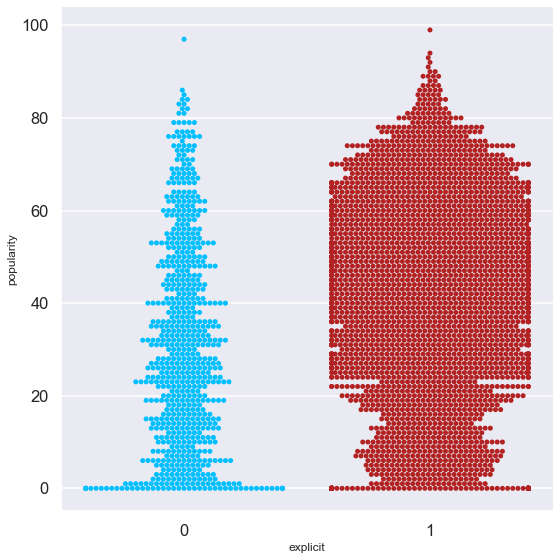

In [8]:
explicit_viz(train)

## Takeaways

# Model <a class="anchor" id="model"></a>

### Prepare data for modeling

In [9]:
from preprocessing import spotify_split, scale_data, modeling_prep
from model import get_baseline_metrics, linear_regression_model, lasso_lars
from model import polynomial_regression, evaluate_df

In [10]:
df = modeling_prep()

In [11]:
# split the data for modeling
X_train, y_train, X_validate, y_validate, X_test, y_test, train, validate, test = spotify_split(df, 'popularity')
X_train.head(3)

Shape of train: (4012, 24) | Shape of validate: (861, 24) | Shape of test: (860, 24)
Percent train: 70.0        | Percent validate: 15.0       | Percent test: 15.0


,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,...,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day,is_explicit,top_ten_label,compilation,single
track_id,,,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,0.585,0.471,4,-9.934,0,0.0616,0.0184,0.115,0.323,93.099,...,142,2,0,2019,4,19,1,0,0,1
0HO8pCseEpgozNi3z0R4bc,0.833,0.518,10,-10.126,0,0.3490,0.0000,0.635,0.773,180.008,...,120,2,0,2015,3,17,1,0,0,0
643K3eEgRvdJiXjSzlz7dg,0.471,0.671,1,-6.050,1,0.3410,0.0000,0.308,0.850,176.863,...,252,4,0,1998,8,11,1,0,0,0


In [12]:
# scale the data: min-max scaler
X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(train, validate, test, 'popularity', 'MinMax')
X_train_scaled.head(3)

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,...,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day,is_explicit,top_ten_label,compilation,single
track_id,,,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,0.593306,0.439493,0.363636,0.580823,0.0,0.064033,0.019127,0.101302,0.328921,0.422695,...,0.235832,0.222222,0.0,0.972973,0.272727,0.600000,1.0,0.0,0.0,1.0
0HO8pCseEpgozNi3z0R4bc,0.844828,0.489960,0.909091,0.572667,0.0,0.362786,0.000000,0.651741,0.787169,0.817286,...,0.195612,0.222222,0.0,0.864865,0.181818,0.533333,1.0,0.0,0.0,0.0
643K3eEgRvdJiXjSzlz7dg,0.477688,0.654247,0.090909,0.745826,1.0,0.354470,0.000000,0.305600,0.865580,0.803007,...,0.436929,0.444444,0.0,0.405405,0.636364,0.333333,1.0,0.0,0.0,0.0


### Baseline Model

In [13]:
#baseline is the mean popularity of the training dataset
bl, bl_train_rmse = get_baseline_metrics(y_train)

RMSE (Root Mean Square Error) of Baseline on train data:
 22.897138


### Train Models

In [14]:
# OLS Model(defaults)
lm_rmse, lm_rmse_v = linear_regression_model(X_train, y_train, X_validate, y_validate)
# LASSO + LARS Model(alpha=.00001)
lars_rmse, lars_rmse_v, lars_rmse_t = lasso_lars(X_train, y_train, X_validate, y_validate, X_test, y_test, alpha=.00001, fit_intercept=True)
# Polynomial Features (squared, deg=2) with Linear Regression
lm_sq_rmse, lm_sq_rmse_v = polynomial_regression(X_train, y_train, X_validate, y_validate, 'Squared', degree=2) 
# Polynomial Features (cubed, deg=3) with Linear Regression
lm_cb_rmse, lm_cb_rmse_v =  polynomial_regression(X_train, y_train, X_validate, y_validate, 'Cubed', degree=3) 

RMSE for OLS using Linear Regression 

On train data:
 20.910148 

RMSE for LASSO + LARS 

On train data:
 20.911551 

RMSE for Polynomial Squared + Linear Regression 

On train data:
 19.015835 

RMSE for Polynomial Cubed + Linear Regression 

On train data:
 17.551819 



### Evaluate Models

In [15]:
evaluate_df(bl_train_rmse, lm_rmse, lars_rmse, lars_rmse_v, 
            lars_rmse_t, lm_sq_rmse, lm_sq_rmse_v, 
            lm_cb_rmse, lm_cb_rmse_v)

Model beat baseline by 9.22%


,train_rmse,validate_rmse,test_rmse
pf3_lr,17.551819,44.7505,-
pf2_lr,19.015835,21.2226,-
ols,20.910148,-,-
lassolars,20.911551,20.891,20.7853
baseline,22.897138,-,-


## Takeaways

<div class="alert alert-block alert-info">
    <li>Polynomial features cubed is overfit</li>
    <li>Polynomial features squared and Lasso lars perform best on train and validate</li>
    <li><b>Best Model</b> is Lasso Lars since it performed better on unseen data</li>
    <li>Beat the baseline by 9.22%.</li>
    </div>

# Conclusions <a class="anchor" id="conclusions"></a>